## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 7
---------------------------------------

GOALS:

1. Answer all the questions from the lecture - we will use the scientists data and the grocery data.
2. Analyze data about College majors - your first EDA! (Think of this as a practice exam.)

----------------------------------------------------------

This homework has **9 Questions** and **A Practice Exam**

NOTE:
The practice exam is intended to give you an idea of what an exam in this class might feel like. Remember you will be expected to work on the exam **independently** and submit your work before we get together to work on the exam in class. **15\% of your Exam grade will come from what you can do independently** so start practicing now and get help if you need it!.

In [88]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Lecture Questions

First we will import the data about female scientists.

In [14]:
file1 = 'https://joannabieri.com/introdatascience/data/dates.csv'
DF_dates = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/professions.csv'
DF_professions = pd.read_csv(file2)
file3 = 'https://joannabieri.com/introdatascience/data/works.csv'
DF_works = pd.read_csv(file3)
show(DF_dates)
show(DF_professions)
show(DF_works)

Loading ITables v2.5.2 from the internet... (need help?)


Loading ITables v2.5.2 from the internet... (need help?)


Loading ITables v2.5.2 from the internet... (need help?)


**Q1** Are each of these data sets Tidy? Each of these are really tidy, they are easy to understand and the columns are put together.

**Q2** Do they all contain the same number of observations?
They dont, all of them are showing different things 
**Q3** What are the five variables?
the five variables are; birth year, death year, profession, what they're known for and the name of the person.
**Q4** What variable do they have in common - what can we join **on** they have all in common what they are kind of known for, they are all successful people in the field they are practicing


1. Each of these are really tidy, they are easy to understand and the columns are put together.
2. They dont, all of them are showing different things 
3. The five variables are; birth year, death year, profession, what they're known for and the name of the person.
4. they have all in common what they are kind of known for, they are all successful people in the field they are practicing


## Combining Three Data Sets

You need to think about the order and whether or not you want to keep the maximum number of names or only keep names that are in all the data frames.

In this case we will try to keep the maximal amount of data - the maximum number of names.

1. Combine the professions and works data
2. Then add the dates data

In [15]:
# 1. Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='right')
DF_scientists
# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='right')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897,1984.0
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912,1997.0
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918,2020.0
3,Rosalind Franklin,NaN,NaN,1920,1958.0
4,Vera Rubin,Astronomer,existence of dark matter,1928,2016.0
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947,NaN
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964,NaN


**Q5** What, if anything, would change if you switched to how='right'? 

It is not including the people who have no death or birth year. When changed to right, they are rearranging the columns and taking out Ada Lovelace and Marie Curie.

## Combining Two Data Sets - You Try

**Q6** Write code that would combine the professions data and the dates data, but drop any names that don't appear in both.

In [16]:
# Your code here
DF_scientists = pd.merge(DF_professions,DF_dates,on='name',how='right')
DF_scientists


,name,profession,birth_year,death_year
0,Janaki Ammal,Botanist,1897,1984.0
1,Chien-Shiung Wu,Physicist,1912,1997.0
2,Katherine Johnson,Mathematician,1918,2020.0
3,Rosalind Franklin,Chemist,1920,1958.0
4,Vera Rubin,Astronomer,1928,2016.0
5,Gladys West,Mathematician,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,1947,NaN
7,Jennifer Doudna,Biochemist,1964,NaN


## Combining Three Data Sets - You Try

**Q7** Try to combine the three data sets together (professions, works, and dates) but instead of doing what we did above, see if you can keep only the names that appeared in all three data sets.

In [19]:
# Your code here

DF_scientists = pd.merge(DF_professions, DF_works, on='name', how='inner')
DF_scientists = pd.merge(DF_scientists, DF_dates, on='name', how='inner')
print(DF_scientists)

                 name                          profession  \
0        Janaki Ammal                            Botanist   
1     Chien-Shiung Wu                           Physicist   
2   Katherine Johnson                       Mathematician   
3          Vera Rubin                          Astronomer   
4         Gladys West                       Mathematician   
5  Flossie Wong-Staal  Virologist and Molecular Biologist   
6     Jennifer Doudna                          Biochemist   

                                           known_for  birth_year  death_year  
0            hybrid species, biodiversity protection        1897      1984.0  
1  confim and refine theory of radioactive beta d...        1912      1997.0  
2  calculations of orbital mechanics critical to ...        1918      2020.0  
3                           existence of dark matter        1928      2016.0  
4  mathematical modeling of the shape of the Eart...        1930         NaN  
5  first scientist to clone HIV and c

## Case study - Grocery Sales

Below you will load some data about grocery sales and see how joining or merging data can help us answer questions.

In [21]:
file1 = 'https://joannabieri.com/introdatascience/data/purchases.csv'
DF_purchases = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/prices.csv'
DF_prices = pd.read_csv(file2)
(DF_purchases)
(DF_prices)

,item,price
0,avocado,0.50
1,banana,0.15
2,bread,1.00
3,milk,0.80
4,toilet paper,3.00


## Calculate the total revenue

**Q8** Given the data above find the total revenue.

We will have to join the data frames so that we can see the price of what was sold. So first we look for a common column. In this case both data frames have **item** as a column.

Now, think about how to calculate revenue... we need to add up the total money we made, so we need to know the price of each thing sold.

**PAUSE - see if you can write some of the code for this before looking at the cells below**

In [7]:
#DF_combine = pd.merge

In [8]:
#DF_price

In [9]:
#DF_combined=['price']

In [25]:
#
DF_combined = pd.merge(DF_prices,DF_purchases,on='item',how='right')
DF_combined
DF_combined['price'].sum()

np.float64(5.75)

**See the lecture notes if you need heelp figuring this out!**

**Q9** Calculate the revenue per customer? Hint - group by the customer id and then apply the sum().

In [29]:
# Your code here
DF_combined = pd.merge(DF_prices, DF_purchases, on='item', how='right')
DF_combined['revenue'] = DF_combined['price']
customer_revenue = (
    DF_combined
    .groupby('customer_id')['revenue']
    .sum()
    .reset_index(name='total_revenue')
)

print(customer_revenue)



   customer_id  total_revenue
0            1           1.95
1            2           3.80


# Practice Exam - EDA - College Majors

Your solutions should include code written to answer the questions AND words describing the results. For each problem:

1. Write code to get the answers. It is okay to copy and paste from our lecture notes or your homework assignments.
2. Describe what the code output is telling you.
3. Explain any interesting aspects of your results.

------------------------
-------------------------

The first step in the process of turning information into knowledge process is to summarize and describe the raw information - the data.
In this assignment we explore data on college majors and earnings, specifically the data begin the FiveThirtyEight story ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

These data originally come from the American Community Survey (ACS) 2010-2012 Public Use Microdata Series.
While this is outside the scope of this assignment, if you are curious about how raw data from the ACS were cleaned and prepared, see [the code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R) FiveThirtyEight authors used.

We should also note that there are many considerations that go into picking a major.
Earnings potential and employment prospects are two of them, and they are important, but they don't tell the whole story.
Keep this in mind as you analyze the data.

In [30]:
file_location = 'https://joannabieri.com/introdatascience/data/recent-grads.csv'
DF_raw = pd.read_csv(file_location)

In [31]:
DF_raw

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### 1. Describe the data that you see here.

* How many variables?
* How man observations?
* Are the variables categorical or numerical?
* Are there any variables that you don't know what they mean? If so [CLICK HERE - to see the Git Repo for the data where the variables are defined](https://github.com/fivethirtyeight/data/tree/master/college-majors)


In [32]:
#
DF_raw.shape

(173, 21)

This data set has 173 observations and 21 variables.

In [16]:
#The variables are catgorical and also numerical.

In [17]:
#I think the only variables that are P25 and P75, but I was able to see the list on Git Repo and understand that P25 stands for the 25th percintile of earnings while P75 means the 75th percentile of earnings.

### 2. Answer some questions about the data

* Which major has the lowest unemployment rate? Show a data frame that answers this question, but only show columns that are useful to the answer.
* Which major has the highest percentage of women? Show a data frame that answers this question, but only show columns that are useful to the answer.
* How do the distributions of median income compare across major categories?
    * First get a value count on what major categories are in the data. What categories are most or least represented?
    * Do some summary statistics using the .group_by() command to see the statistics for each major category.
    * Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
    * Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
    * Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

In [33]:
DF_raw.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [35]:
# Which major has the lowest unemployment rate? Show a data frame that answers this question, 
# but only show columns that are useful to the answer.
my_columns = ['Unemployment_rate','Major']
DF_raw[my_columns].sort_values('Unemployment_rate')

mask = DF_raw['Unemployment_rate'] >0
DF_new = DF_raw[mask]
DF_new[my_columns].sort_values('Unemployment_rate')


,Unemployment_rate,Major
14,0.006334,ENGINEERING MECHANICS PHYSICS AND SCIENCE
19,0.011690,COURT REPORTING
119,0.016203,MATHEMATICS TEACHER EDUCATION
0,0.018381,PETROLEUM ENGINEERING
64,0.019642,GENERAL AGRICULTURE
...,...,...
29,0.128426,PUBLIC POLICY
170,0.149048,CLINICAL PSYCHOLOGY
84,0.151850,COMPUTER NETWORKING AND TELECOMMUNICATIONS
89,0.159491,PUBLIC ADMINISTRATION


In [36]:
# Do some summary statistics using the .group_by() 
# command to see the statistics for each major category.
some_cols = ['Total','Major_category']
DF_raw[some_cols].groupby('Major_category').describe()

Total                                \
                                    count           mean            std   
Major_category                                                            
Agriculture & Natural Resources       9.0    8402.222222    7135.038626   
Arts                                  8.0   44641.250000   33635.404025   
Biology & Life Science               14.0   32418.714286   72233.366437   
Business                             13.0  100182.769231  111655.873560   
Communications & Journalism           4.0   98150.250000   77782.804648   
Computers & Mathematics              11.0   27182.545455   39493.602987   
Education                            16.0   34945.562500   49464.706843   
Engineering                          29.0   18537.344828   25231.657274   
Health                               12.0   38602.500000   54985.649362   
Humanities & Liberal Arts            15.0   47564.533333   53315.821235   
Industrial Arts & Consumer Services   7.0   32827.428571   45004.155763   
Interdisciplinary                     1.0   12296.000000            NaN   
Law & Public Policy                   5.0   35821.400000   65557.338070   
Physical Sciences                    10.0   18547.900000   25875.330338   
Psychology & Social Work              9.0   53445.222222  128654.924027   
Social Science                        9.0   58885.111111   67698.828368   

                                                                            \
                                         min       25%      50%        75%   
Major_category                                                               
Agriculture & Natural Resources        685.0   2439.00   7416.0   13773.00   
Arts                                  3340.0  16795.25  41005.0   64084.75   
Biology & Life Science                1329.0   4975.50  12184.5   21120.00   
Business                              3777.0  17947.00  25894.0  198633.00   
Communications & Journalism          52824.0  53077.50  62890.5  107963.25   
Computers & Mathematics                609.0   5595.00   8066.0   27366.50   
Education                              804.0   9233.25  18661.5   31398.50   
Engineering                            720.0   2906.00   4790.0   18968.00   
Health                               11123.0  15282.00  19322.0   34769.00   
Humanities & Liberal Arts             3079.0  17777.00  30207.0   51530.00   
Industrial Arts & Consumer Services    124.0   6472.50  15150.0   38249.50   
Interdisciplinary                    12296.0  12296.00  12296.0   12296.00   
Law & Public Policy                   1148.0   5629.00   5978.0   13528.00   
Physical Sciences                     1436.0   2012.50   3230.5   26849.50   
Psychology & Social Work              1386.0   2854.00   4626.0    9628.00   
Social Science                        3283.0  12920.00  19879.0  115433.00   

                                               
                                          max  
Major_category                                 
Agriculture & Natural Resources       21573.0  
Arts                                 103480.0  
Biology & Life Science               280709.0  
Business                             329927.0  
Communications & Journalism          213996.0  
Computers & Mathematics              128319.0  
Education                            170862.0  
Engineering                           91227.0  
Health                               209394.0  
Humanities & Liberal Arts            194673.0  
Industrial Arts & Consumer Services  125074.0  
Interdisciplinary                     12296.0  
Law & Public Policy                  152824.0  
Physical Sciences                     66530.0  
Psychology & Social Work             393735.0  
Social Science                       182621.0

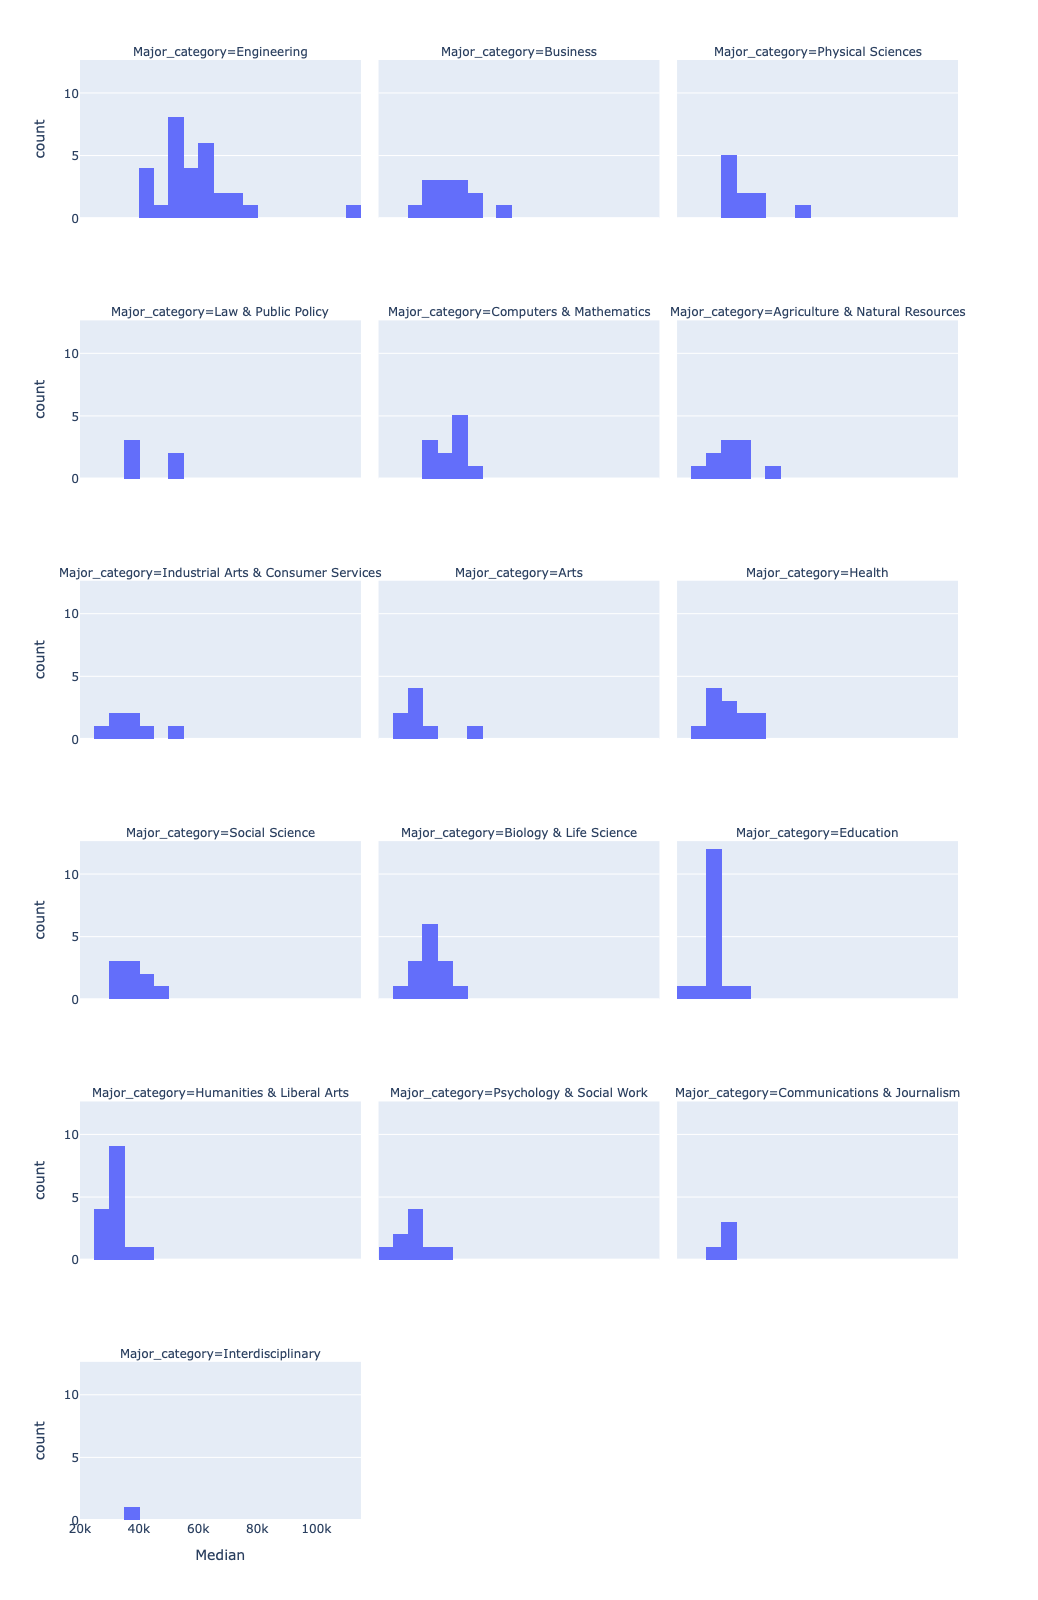

In [40]:
# Make a histogram that explores median income for each of the major categories (facet_col).
# How did you choose your number of bins? I chose the number of bins by looking at each of the histograms, a number lower than 18 was causing the histogram to shift left rather than to show all the data I wanted.

fig = px.histogram(DF_raw,
                  x = 'Median',
                   nbins = 18,
                  facet_col='Major_category',
                  facet_col_wrap=3)

fig.update_layout(autosize=False,
                  width=800,
                  height=1600)

fig.show()

In [45]:
# Answer the question: Which major category has the highest typical 
# (you'll need to decide what this means) median income?

my_columns = ['Major_category','Median','Total']
DF_raw[my_columns].groupby('Major_category').mean()

,Median,Total
Major_category,,
Agriculture & Natural Resources,36900.000000,8402.222222
Arts,33062.500000,44641.250000
Biology & Life Science,36421.428571,32418.714286
Business,43538.461538,100182.769231
Communications & Journalism,34500.000000,98150.250000
Computers & Mathematics,42745.454545,27182.545455
Education,32350.000000,34945.562500
Engineering,57382.758621,18537.344828
Health,36825.000000,38602.500000


In [47]:
#The major category that has the highest typical median income is Engineering. This means which category is earning more than the others by looking at just the median salaries.

### 3. More complicated questions

* Are all STEM fields the same in terms job opportunities?
    * Assume the following are STEM major categories
    
  ``` ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]```
  
    * Create a DataFrame (using a mask) so you only look at STEM majors.
    * Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?
* What types of majors do women tend to major in?
    * Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

In [63]:
# Create the mask
# 4 different majors
# mask the data frame

mask=(DF_raw['Major_category']=="Biology & Life Science") | (DF_raw['Major_category']=="Computers & Mathematics") | (DF_raw['Major_category']=="Engineering") | (DF_raw['Major_category']=="Physical Sciences") 
DF_stem=DF_raw[mask]
DF_stem['Major_category'].value_counts()


Major_category
Engineering                29
Biology & Life Science     14
Computers & Mathematics    11
Physical Sciences          10
Name: count, dtype: int64

In [64]:
#Find median for all majors
#FInd median for all stem majors
#Find the median for each individual stem mejor

median_all = DF_raw['Median'].median()
median_all


36000.0

In [90]:
#["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]
median_stem = DF_stem['Median'].median()
print(median_stem)

major_cat = "Biology & Life Science"
mask = DF_stem ['Major_category'] == major_cat
cat_median = DF_stem[mask]['Median'].median()
print(cat_median)

#MY COMMENTS:The median income for all stem majors is higher than for all majors. Within stem majors, Biology and Life Sciences has the lowest median at 36300 which is only a little bit higher than the number for all majors which is 36000. 

45000.0
36300.0


### 4. Ask a question of interest to you.

In [91]:
DF_raw.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [92]:
#

In [93]:
my_col = ['Major', 'Major_category','ShareWomen']
DF_raw[my_col].sort_values(by='ShareWomen',ascending=False)

,Major,Major_category,ShareWomen
164,EARLY CHILDHOOD EDUCATION,Education,0.968954
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,0.967998
51,MEDICAL ASSISTING SERVICES,Health,0.927807
138,ELEMENTARY EDUCATION,Education,0.923745
150,FAMILY AND CONSUMER SCIENCES,Industrial Arts & Consumer Services,0.910933
...,...,...,...
1,MINING AND MINERAL ENGINEERING,Engineering,0.101852
26,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,0.090713
66,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,Engineering,0.077453
73,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,0.000000


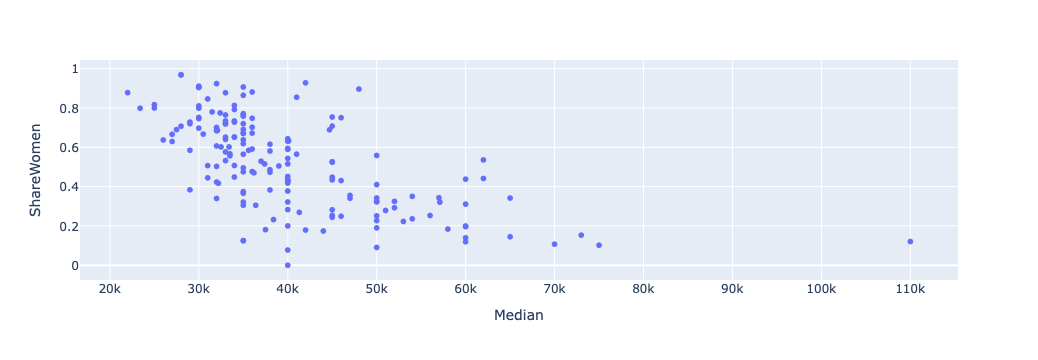

In [94]:
px.scatter(DF_raw,x='Median' , y='ShareWomen')

IMPORTANT! The results on top are still from question 3, from now on, the answers below will be my own question and answers for question 4.

In [95]:
#QUESTION 4: Which out of all stem majors has the highest median salary?
#["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]
median_stem = DF_stem['Median'].median()
print(median_stem)


major_cat = "Engineering"
mask = DF_stem ['Major_category'] == major_cat
cat_median = DF_stem[mask]['Median'].median()
print(cat_median)

45000.0
57000.0


Engineering has the highest median salary out of all the other stem majors compared to the overall total median salary that is 45000 of all the majors combined.